### ***Task 3:CHURN_MODELLING***

**Importing libraries and uploading data**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Cleaning Data**

In [5]:
# Show basic info and check missing values
df.info()
print("\n🔍 Missing Values per Column:\n")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB

🔍 Missing Values per Column:

RowNumber          0
CustomerId         0
Surname            0


In [10]:
#drop irrelevant column
#  Drop irrelevant columns
df_cleaned = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

# Confirm the drop
print("Dropped columns: ['RowNumber', 'CustomerId', 'Surname']")
print(" New shape of dataset:", df_cleaned.shape)
print("\n New columns:\n", df_cleaned.columns)


Dropped columns: ['RowNumber', 'CustomerId', 'Surname']
 New shape of dataset: (10000, 11)

 New columns:
 Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')


In [9]:
# missing value

print("\n Checking missing values after dropping columns:\n")
print(df_cleaned.isnull().sum())

# Fill missing values using forward fill (modern syntax)
df_cleaned = df_cleaned.ffill()  # or use .bfill() for backward fill

# Confirm missing values are handled
print("\n Missing values after treatment:\n")
print(df_cleaned.isnull().sum())




 Checking missing values after dropping columns:

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 Missing values after treatment:

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


**Encode columns**

In [14]:
#  One-Hot Encode 'Geography'
df_encoded = pd.get_dummies(df_cleaned, columns=['Geography'], drop_first=True)
print(" One-Hot Encoding applied to 'Geography'\nNew Columns:")
print([col for col in df_encoded.columns if 'Geography' in col])



 One-Hot Encoding applied to 'Geography'
New Columns:
['Geography_Germany', 'Geography_Spain']


In [15]:
# Label Encode 'Gender' (Male=1, Female=0)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])

print("\n Label Encoding applied to 'Gender'")
print("Gender Value Counts:\n", df_encoded['Gender'].value_counts())



 Label Encoding applied to 'Gender'
Gender Value Counts:
 Gender
1    5457
0    4543
Name: count, dtype: int64


In [16]:
#split feature
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

print("\n Features and target variable separated.")
print(" Feature matrix shape:", X.shape)
print(" Target vector shape:", y.shape)




 Features and target variable separated.
 Feature matrix shape: (10000, 11)
 Target vector shape: (10000,)


In [17]:
#standarize feature
X = df_encoded.drop('Exited', axis=1)
y = df_encoded['Exited']

print("\n Features and target variable separated.")
print(" Feature matrix shape:", X.shape)
print(" Target vector shape:", y.shape)



 Features and target variable separated.
 Feature matrix shape: (10000, 11)
 Target vector shape: (10000,)


**Train model**

In [18]:
# 🔹 Step: Train-Test Split (if not already done)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [20]:
#train test split
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Data split complete")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


Data split complete
X_train shape: (8000, 11)
X_test shape: (2000, 11)


In [23]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

print(" Model training completed successfully!")



 Model training completed successfully!


In [24]:
#make prediction
# Predict test data
y_pred = model.predict(X_test)

print(" Predictions made successfully!")
print(" Sample predictions (first 10):", y_pred[:10])


 Predictions made successfully!
 Sample predictions (first 10): [0 0 0 0 0 0 0 0 0 0]


**Analyze**

In [28]:
# Extract feature importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Match features with importance scores
feature_names = X.columns  # original column names before scaling
importances = model.feature_importances_

# Create a DataFrame
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feat_imp_sorted = feat_imp.sort_values(by='Importance', ascending=False)


C:\Users\HP\AppData\Local\Temp\ipykernel_12252\783669945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


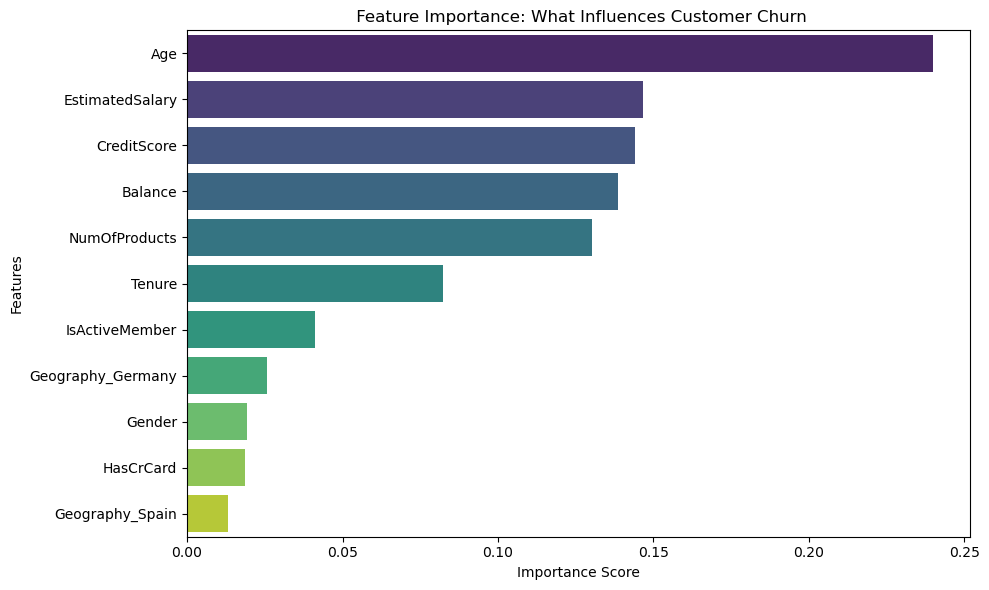

In [27]:
#  Visualize important features

plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=feat_imp_sorted, 
    hue=None,                  
    legend=False,              
    palette='viridis'
)
plt.title(' Feature Importance: What Influences Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

